In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
import mysql.connector as connection
import math

In [175]:
mydb = connection.connect(host="localhost", port="3306", database="employee_hiring", user="root", passwd="Mini*9247")
cursor = mydb.cursor()
selectquery = "show tables"
cursor.execute(selectquery)
records = cursor.fetchall()
tables = []
for i in records:
    tables.append(i[0])
tab = []
for i in tables:
    tab.append(i[0:3])
cursor = mydb.cursor()
query = 'describe april_2014'
cursor.execute(query)
colu = cursor.fetchall()
col = []
for i in colu:
    col.append(i[0])
df_all = dict()
ctr=0
for i in tab:
    query = 'select * from '+tables[ctr]+';'
    cursor.execute(query)
    df = pd.DataFrame(cursor.fetchall(),columns=col)
    df[df==''] = np.nan
    df_all[i]  = df.copy()
    ctr+=1

In [176]:
off_fill = pd.DataFrame(index=tab,columns=["Offered","Non Filled"])
for i in df_all:
    df_of = df_all[i][["Offered","Filled"]]
    d = df_of["Offered"].isna()
    f = df_of[d==False]
    g = f[f["Filled"].isna()]
    off_fill.loc[i,"Offered"] = len(f)
    off_fill.loc[i,"Non Filled"] = len(g)

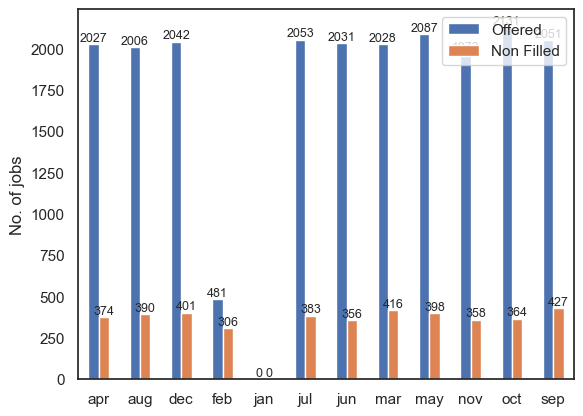

In [177]:
ax3 = off_fill.plot.bar(rot=0,ylabel="No. of jobs")
for i in ax3.containers:
    ax3.bar_label(i,fontsize="9")
fig = ax3.get_figure()
fig.savefig("task3.png")

In [179]:
def plot_non_filled_and_offerd_jobs():
    mydb = connection.connect(host="localhost", port="3306", database="employee_hiring", user="root", passwd="Mini*9247")
    cursor = mydb.cursor()
    selectquery = "show tables"
    cursor.execute(selectquery)
    records = cursor.fetchall()
    tables = []
    for i in records:
        tables.append(i[0])
    tab = []
    for i in tables:
        tab.append(i[0:3])
    cursor = mydb.cursor()
    query = 'describe april_2014'
    cursor.execute(query)
    colu = cursor.fetchall()
    col = []
    for i in colu:
        col.append(i[0])
    df_all = dict()
    ctr=0
    for i in tab:
        query = 'select * from '+tables[ctr]+';'
        cursor.execute(query)
        df = pd.DataFrame(cursor.fetchall(),columns=col)
        df[df==''] = np.nan
        df_all[i]  = df.copy()
        ctr+=1
    off_fill = pd.DataFrame(index=tab,columns=["Offered","Non Filled"])
    for i in df_all:
        df_of = df_all[i][["Offered","Filled"]]
        d = df_of["Offered"].isna()
        f = df_of[d==False]
        g = f[f["Filled"].isna()]
        off_fill.loc[i,"Offered"] = len(f)
        off_fill.loc[i,"Non Filled"] = len(g)
    ax3 = off_fill.plot.bar(rot=0,ylabel="No. of jobs")
    for i in ax3.containers:
        ax3.bar_label(i,fontsize="9")
    fig = ax3.get_figure()
    fig.savefig("task3.png")
    arrNonfilledjobs = list(off_fill["Non Filled"])
    arrOfferedJobs = list(off_fill["Offered"])
    return arrNonfilledjobs, arrOfferedJobs

([374, 390, 401, 306, 0, 383, 356, 416, 398, 358, 364, 427],
 [2027, 2006, 2042, 481, 0, 2053, 2031, 2028, 2087, 1973, 2131, 2051])

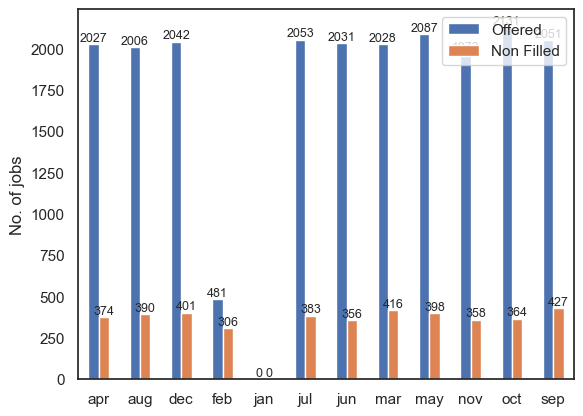

In [180]:
plot_non_filled_and_offerd_jobs()